In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
file_path = '../resources/data_scss.tab'
column_names = [
    'ID', "RA", "DEC", "EPOCH", "MU_ACOSD", "MU_D", "SIGMU_A", "SIGMU_D",
    "B_J", "R_1", "R_2", "I", "AREA", "A_I", "B_I", "P_A", "CLASS",
    "N(0,1)", "BLEND", "QUALITY", "FIELD", "XMIN", "XMAX", "YMIN",
    "YMAX", "IPEAK", "MAG", "ISKY", "XCEN_I", "YCEN_I", "A_U", "B_U",
    "THETA_U", "THETA_I", "AP(1)", "AP(2)", "AP(3)", "AP(4)", "AP(5)",
    "AP(6)", "AP(7)", "AP(8)", "PRFMAG"
]

data = pd.read_csv(file_path, sep='\t', skiprows=1, names=column_names, low_memory=False)

for col in column_names:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.head()

,ID,RA,DEC,EPOCH,MU_ACOSD,MU_D,SIGMU_A,SIGMU_D,B_J,R_1,...,THETA_I,AP(1),AP(2),AP(3),AP(4),AP(5),AP(6),AP(7),AP(8),PRFMAG
0,1,1.050685,-37.735992,1980.546,999900000.0,999900000.0,999900000.0,999900000.0,21.990,99.999,...,45,8,8,5,4,4,0,0,0,-20411
1,2,0.094469,-37.735630,1980.546,999900000.0,999900000.0,999900000.0,999900000.0,22.101,99.999,...,29,6,2,0,0,0,0,0,0,-19886
2,3,0.896799,-37.735579,1980.546,999900000.0,999900000.0,999900000.0,999900000.0,20.471,99.999,...,102,32,29,28,20,14,1,0,0,-21563
3,4,0.031485,-37.734743,1980.546,999900000.0,999900000.0,999900000.0,999900000.0,21.507,99.999,...,91,13,12,11,9,5,1,0,0,-20777
4,5,0.071919,-37.734154,1980.546,999900000.0,999900000.0,999900000.0,999900000.0,22.220,99.999,...,15,8,6,5,4,1,0,0,0,-20261


In [3]:
data.describe()

,ID,RA,DEC,EPOCH,MU_ACOSD,MU_D,SIGMU_A,SIGMU_D,B_J,R_1,...,THETA_I,AP(1),AP(2),AP(3),AP(4),AP(5),AP(6),AP(7),AP(8),PRFMAG
count,901322.000000,901322.000000,901322.000000,901322.000000,9.013220e+05,9.013220e+05,9.013220e+05,9.013220e+05,901322.00000,901322.000000,...,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000,901322.000000
mean,450661.500000,140.273545,-34.713132,1979.305483,3.528797e+08,3.528796e+08,3.528797e+08,3.528797e+08,21.34773,60.700134,...,83.304502,45.260508,39.091352,30.948022,22.620004,15.504817,10.040874,5.904276,1.466353,-20944.064267
std,260189.394001,172.360025,2.901060,2.492692,4.778290e+08,4.778290e+08,4.778290e+08,4.778290e+08,1.63844,40.538236,...,49.663503,958.278532,914.741789,842.624354,730.854814,556.205262,344.296104,148.599919,29.125783,1405.761343
min,1.000000,0.000004,-39.739167,1976.879000,-8.988000e+02,-9.143000e+02,5.149000e+00,4.481000e+00,5.98600,5.193000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-35442.000000
25%,225331.250000,3.030887,-37.273960,1977.684000,-3.322000e+00,-8.053000e+00,1.587000e+01,1.534000e+01,20.87400,19.477000,...,43.000000,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21338.000000
50%,450661.500000,6.003823,-34.719345,1978.809000,1.739000e+01,1.272000e+01,2.181000e+01,2.133000e+01,21.87000,99.999000,...,78.000000,14.000000,11.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-20489.000000
75%,675991.750000,357.118258,-32.142215,1980.546000,9.999000e+08,9.999000e+08,9.999000e+08,9.999000e+08,22.40700,99.999000,...,123.000000,35.000000,29.000000,22.000000,14.000000,5.000000,0.000000,0.000000,0.000000,-20065.000000
max,901322.000000,359.999992,-29.752257,1985.547000,9.999000e+08,9.999000e+08,9.999000e+08,9.999000e+08,23.20000,99.999000,...,179.000000,630620.000000,605632.000000,563171.000000,497184.000000,390339.000000,243992.000000,99999.000000,7371.000000,-19246.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901322 entries, 0 to 901321
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        901322 non-null  int64  
 1   RA        901322 non-null  float64
 2   DEC       901322 non-null  float64
 3   EPOCH     901322 non-null  float64
 4   MU_ACOSD  901322 non-null  float64
 5   MU_D      901322 non-null  float64
 6   SIGMU_A   901322 non-null  float64
 7   SIGMU_D   901322 non-null  float64
 8   B_J       901322 non-null  float64
 9   R_1       901322 non-null  float64
 10  R_2       901322 non-null  float64
 11  I         901322 non-null  float64
 12  AREA      901322 non-null  int64  
 13  A_I       901322 non-null  int64  
 14  B_I       901322 non-null  int64  
 15  P_A       901322 non-null  int64  
 16  CLASS     901322 non-null  int64  
 17  N(0,1)    901322 non-null  float64
 18  BLEND     901322 non-null  int64  
 19  QUALITY   901322 non-null  int64  
 20  FIEL

In [5]:
data.count()

ID          901322
RA          901322
DEC         901322
EPOCH       901322
MU_ACOSD    901322
MU_D        901322
SIGMU_A     901322
SIGMU_D     901322
B_J         901322
R_1         901322
R_2         901322
I           901322
AREA        901322
A_I         901322
B_I         901322
P_A         901322
CLASS       901322
N(0,1)      901322
BLEND       901322
QUALITY     901322
FIELD       901322
XMIN        901322
XMAX        901322
YMIN        901322
YMAX        901322
IPEAK       901322
MAG         901322
ISKY        901322
XCEN_I      901322
YCEN_I      901322
A_U         901322
B_U         901322
THETA_U     901322
THETA_I     901322
AP(1)       901322
AP(2)       901322
AP(3)       901322
AP(4)       901322
AP(5)       901322
AP(6)       901322
AP(7)       901322
AP(8)       901322
PRFMAG      901322
dtype: int64

In [6]:
irrelevant_columns = ["ID", "EPOCH", "MU_ACOSD", "MU_D", "SIGMU_A", "SIGMU_D",
                      "XCEN_I", "YCEN_I", "P_A", "XMIN", "XMAX", "YMIN", "YMAX", "AP(1)",
                      "AP(2)", "AP(3)", "AP(4)", "AP(5)", "AP(6)", "AP(7)", "AP(8)"]

data.drop(columns=irrelevant_columns, inplace=True)
filtered_data = data[data['CLASS'].isin([1, 2])].copy()

In [7]:
filtered_data.head()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,QUALITY,FIELD,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG
1,0.094469,-37.735630,22.101,99.999,99.999,99.999,10,2654,1403,1,...,0,349,3840520,-18725,23870218,2633,1438,29,29,-19886
2,0.896799,-37.735579,20.471,99.999,99.999,99.999,33,3473,2222,2,...,0,349,22747408,-21330,23938836,3945,2786,101,102,-21563
5,359.993240,-37.733648,21.844,99.999,99.999,99.999,14,2498,1851,1,...,0,349,4216504,-19137,23897590,2528,1922,1,179,-20102
6,0.699900,-37.733525,22.098,99.999,99.999,99.999,8,2450,1208,1,...,0,349,3361294,-18428,24035060,2426,1270,80,78,-19750
7,1.165853,-37.733365,22.796,99.999,20.442,99.999,8,2186,1605,2,...,0,349,3292604,-18416,23652962,2181,1637,157,158,-19747


In [8]:
filtered_data.describe()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,QUALITY,FIELD,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG
count,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,872609.000000,...,872609.000000,872609.000000,8.726090e+05,872609.000000,8.726090e+05,8.726090e+05,872609.000000,872609.000000,872609.000000,872609.000000
mean,139.406918,-34.735278,21.322188,59.468657,47.865639,73.206442,54.789296,3581.277035,2475.593342,1.607874,...,0.402306,365.623885,1.520591e+07,-20227.823150,2.621544e+07,4.250248e+03,2951.211454,85.510270,83.116342,-20960.647678
std,172.148016,2.900192,1.656252,40.558185,38.627795,38.656961,1095.508805,2794.055105,1726.296755,0.488225,...,2.503369,49.218429,1.815155e+07,1616.107011,3.893906e+06,3.967875e+03,2679.551367,62.507789,49.638336,1422.677413
min,0.000004,-39.739167,5.986000,5.193000,5.075000,4.773000,8.000000,1382.000000,0.000000,1.000000,...,0.000000,293.000000,1.655152e+06,-33158.000000,1.562602e+07,1.633000e+03,0.000000,0.000000,0.000000,-35442.000000
25%,3.032219,-37.290196,20.829000,19.430000,19.366000,18.644000,11.000000,2534.000000,1564.000000,1.000000,...,0.000000,348.000000,4.802342e+06,-21088.000000,2.379455e+07,2.704000e+03,1633.000000,43.000000,42.000000,-21376.000000
50%,5.990952,-34.758661,21.847000,99.999000,20.439000,99.999000,20.000000,3089.000000,2102.000000,2.000000,...,0.000000,350.000000,7.195708e+06,-19791.000000,2.576238e+07,3.416000e+03,2265.000000,81.000000,78.000000,-20499.000000
75%,357.096700,-32.163512,22.404000,99.999000,99.999000,99.999000,43.000000,3871.000000,2879.000000,2.000000,...,0.000000,409.000000,1.578977e+07,-18978.000000,2.935090e+07,4.625000e+03,3387.000000,125.000000,123.000000,-20060.000000
max,359.999992,-29.752257,23.200000,99.999000,99.999000,99.999000,704915.000000,999999.000000,162254.000000,2.000000,...,80.000000,471.000000,6.296362e+08,-17689.000000,4.378201e+07,1.398057e+06,190335.000000,999.000000,179.000000,-19246.000000


In [9]:
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
filtered_data = filtered_data.dropna(subset=['B_I', 'A_I', 'AREA', 'A_U', 'B_U'])

# drop all rows that have value of column B_U of 0
filtered_data = filtered_data[filtered_data['B_U'] != 0]

In [10]:
filtered_data.count()

RA         872586
DEC        872586
B_J        872586
R_1        872586
R_2        872586
I          872586
AREA       872586
A_I        872586
B_I        872586
CLASS      872586
N(0,1)     872586
BLEND      872586
QUALITY    872586
FIELD      872586
IPEAK      872586
MAG        872586
ISKY       872586
A_U        872586
B_U        872586
THETA_U    872586
THETA_I    872586
PRFMAG     872586
dtype: int64

In [11]:
filtered_data.loc[:, 'Ellipticity'] = 1 - (filtered_data['B_I'] / filtered_data['A_I'])
filtered_data.loc[:, 'Filling_Factor'] = filtered_data['AREA'] / (np.pi * filtered_data['A_U'] * filtered_data['B_U'])

In [12]:
filtered_data.describe()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
count,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,...,8.725860e+05,872586.000000,8.725860e+05,8.725860e+05,872586.000000,872586.000000,872586.000000,872586.000000,872586.000000,8.725860e+05
mean,139.404827,-34.735262,21.322168,59.467589,47.864265,73.205736,54.790398,3581.176778,2475.658595,1.607890,...,1.520620e+07,-20227.855847,2.621553e+07,4.250163e+03,2951.289244,85.510151,83.116160,-20960.671575,0.301013,8.697390e-07
std,172.147521,2.900207,1.656269,40.558186,38.627377,38.657226,1095.523222,2794.011596,1726.272717,0.488221,...,1.815170e+07,1616.114922,3.893892e+06,3.967884e+03,2679.543842,62.508608,49.638977,1422.688163,0.180594,1.232085e-07
min,0.000004,-39.739167,5.986000,5.193000,5.075000,4.773000,8.000000,1382.000000,217.000000,1.000000,...,1.655152e+06,-33158.000000,1.562602e+07,1.633000e+03,268.000000,0.000000,0.000000,-35442.000000,0.000000,4.681975e-09
25%,3.032196,-37.290193,20.829000,19.430000,19.366000,18.644000,11.000000,2534.000000,1564.000000,1.000000,...,4.802463e+06,-21088.000000,2.379474e+07,2.704000e+03,1633.000000,43.000000,42.000000,-21376.000000,0.153372,8.067204e-07
50%,5.990926,-34.758577,21.847000,99.999000,20.439000,99.999000,20.000000,3089.000000,2102.000000,2.000000,...,7.195897e+06,-19791.000000,2.576246e+07,3.416000e+03,2265.000000,81.000000,78.000000,-20499.000000,0.277835,9.016876e-07
75%,357.096679,-32.163466,22.404000,99.999000,99.999000,99.999000,43.000000,3871.000000,2879.000000,2.000000,...,1.579000e+07,-18978.000000,2.935098e+07,4.625000e+03,3387.000000,125.000000,123.000000,-20060.000000,0.424801,9.574075e-07
max,359.999992,-29.752257,23.200000,99.999000,99.999000,99.999000,704915.000000,999999.000000,162254.000000,2.000000,...,6.296362e+08,-17689.000000,4.378201e+07,1.398057e+06,190335.000000,999.000000,179.000000,-19246.000000,0.995240,1.518535e-06


In [13]:
numerical_columns = filtered_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('CLASS')

In [14]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [15]:
filtered_data = remove_outliers(filtered_data, numerical_columns)
filtered_data.describe()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
count,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,...,6.093340e+05,609334.000000,6.093340e+05,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,609334.000000,6.093340e+05
mean,138.273839,-34.725600,22.101487,71.688375,56.878160,87.385071,17.414910,2849.694798,1860.113302,1.630014,...,6.787658e+06,-19421.286733,2.603924e+07,3080.244349,1997.699089,85.332369,85.916770,-20298.896270,0.335557,8.673558e-07
std,171.888278,2.910571,0.549795,38.271993,39.774002,29.465337,9.530974,644.656532,545.067574,0.482801,...,3.433159e+06,763.842056,3.866933e+06,743.338444,652.938530,49.888145,49.868933,473.977913,0.164530,1.165548e-07
min,0.000004,-39.739167,20.174000,11.911000,16.054000,12.963000,8.000000,1382.000000,657.000000,1.000000,...,1.676128e+06,-21517.000000,1.577856e+07,1732.000000,651.000000,0.000000,0.000000,-21625.000000,0.000000,5.381943e-07
25%,3.015364,-37.303836,21.720000,20.281000,20.173000,99.999000,10.000000,2365.000000,1429.000000,1.000000,...,4.357374e+06,-19986.000000,2.364843e+07,2509.000000,1485.000000,45.000000,45.000000,-20619.000000,0.207993,7.936508e-07
50%,5.930444,-34.736841,22.178000,99.999000,20.990000,99.999000,14.000000,2774.000000,1786.000000,2.000000,...,5.742004e+06,-19306.000000,2.567725e+07,2988.000000,1881.000000,83.000000,83.000000,-20230.000000,0.319550,8.867633e-07
75%,357.100775,-32.142103,22.546000,99.999000,99.999000,99.999000,22.000000,3259.000000,2235.000000,2.000000,...,8.210588e+06,-18805.000000,2.885988e+07,3565.000000,2432.000000,126.000000,127.000000,-19944.000000,0.450834,9.554495e-07
max,359.999992,-29.752257,23.200000,99.999000,99.999000,99.999000,62.000000,5029.000000,3983.000000,2.000000,...,1.907907e+07,-17701.000000,3.655989e+07,5268.000000,3894.000000,179.000000,179.000000,-19250.000000,0.817537,1.139305e-06


In [16]:
filtered_data.head()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
1,0.094469,-37.735630,22.101,99.999,99.999,99.999,10,2654,1403,1,...,3840520,-18725,23870218,2633,1438,29,29,-19886,0.471364,8.406987e-07
5,359.993240,-37.733648,21.844,99.999,99.999,99.999,14,2498,1851,1,...,4216504,-19137,23897590,2528,1922,1,179,-20102,0.259007,9.171655e-07
6,0.699900,-37.733525,22.098,99.999,99.999,99.999,8,2450,1208,1,...,3361294,-18428,24035060,2426,1270,80,78,-19750,0.506939,8.265052e-07
7,1.165853,-37.733365,22.796,99.999,20.442,99.999,8,2186,1605,2,...,3292604,-18416,23652962,2181,1637,157,158,-19747,0.265782,7.132401e-07
12,1.752909,-37.730524,22.673,99.999,99.999,99.999,9,2376,1888,2,...,4303484,-18650,23295824,2564,1974,47,54,-19843,0.205387,5.660144e-07


In [17]:
filtered_data = filtered_data[filtered_data['R_1'] != 99.999]
filtered_data = filtered_data[filtered_data['R_2'] != 99.999]
filtered_data = filtered_data[filtered_data['I'] != 99.999]
filtered_data.count()

RA                82880
DEC               82880
B_J               82880
R_1               82880
R_2               82880
I                 82880
AREA              82880
A_I               82880
B_I               82880
CLASS             82880
N(0,1)            82880
BLEND             82880
QUALITY           82880
FIELD             82880
IPEAK             82880
MAG               82880
ISKY              82880
A_U               82880
B_U               82880
THETA_U           82880
THETA_I           82880
PRFMAG            82880
Ellipticity       82880
Filling_Factor    82880
dtype: int64

In [18]:
# convert the class label to strings where 2 is star and 1 is galaxy
filtered_data['CLASS'] = filtered_data['CLASS'].map({2: 'STAR', 1: 'GALAXY'})

In [19]:
filtered_data.describe()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,"N(0,1)",...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
count,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,...,8.288000e+04,82880.000000,8.288000e+04,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,82880.000000,8.288000e+04
mean,116.101831,-34.609442,21.635421,19.618255,19.638447,18.524310,25.612174,3052.162657,2257.151581,1.151306,...,9.916434e+06,-20108.280466,2.620960e+07,3477.552642,2525.172116,83.495125,83.275241,-20701.809821,0.252715,8.980700e-07
std,164.839881,2.703440,0.540954,0.479739,0.476369,0.526529,10.904234,622.193242,514.731863,1.776984,...,3.976646e+06,684.547908,3.713595e+06,757.155779,647.127899,49.930049,49.754978,447.094784,0.131268,8.454675e-08
min,0.000004,-39.739167,20.272000,11.911000,17.433000,12.963000,8.000000,1479.000000,684.000000,-2.988000,...,2.194984e+06,-21517.000000,1.614722e+07,1732.000000,671.000000,0.000000,0.000000,-21625.000000,0.000000,5.382502e-07
25%,2.652058,-36.659263,21.212000,19.275000,19.294000,18.201000,17.000000,2594.000000,1890.000000,-0.210000,...,6.678432e+06,-20652.000000,2.420208e+07,2915.000000,2042.750000,42.000000,42.000000,-21052.000000,0.154285,8.550978e-07
50%,5.454127,-34.582308,21.593000,19.610000,19.620000,18.571000,24.000000,3010.000000,2269.000000,0.892000,...,9.255655e+06,-20187.000000,2.582797e+07,3446.000000,2536.000000,79.000000,78.000000,-20725.000000,0.236008,9.144239e-07
75%,356.425579,-32.421796,22.036000,19.962000,19.973000,18.905000,33.000000,3470.000000,2633.000000,2.355000,...,1.276278e+07,-19622.000000,2.787497e+07,4019.000000,3007.000000,124.000000,123.000000,-20370.000000,0.333333,9.579078e-07
max,359.999968,-29.752350,23.105000,21.054000,21.424000,19.861000,62.000000,5028.000000,3743.000000,6.549000,...,1.907848e+07,-17981.000000,3.481092e+07,5268.000000,3894.000000,179.000000,179.000000,-19362.000000,0.799942,1.139305e-06


## Data Exploration

In [20]:
sns.set_context("paper", rc={"font.size":10,
                             "axes.titlesize":15,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":15})

palette = {'GALAXY':'#4daf4a',
           'STAR':'#ff7f00'}

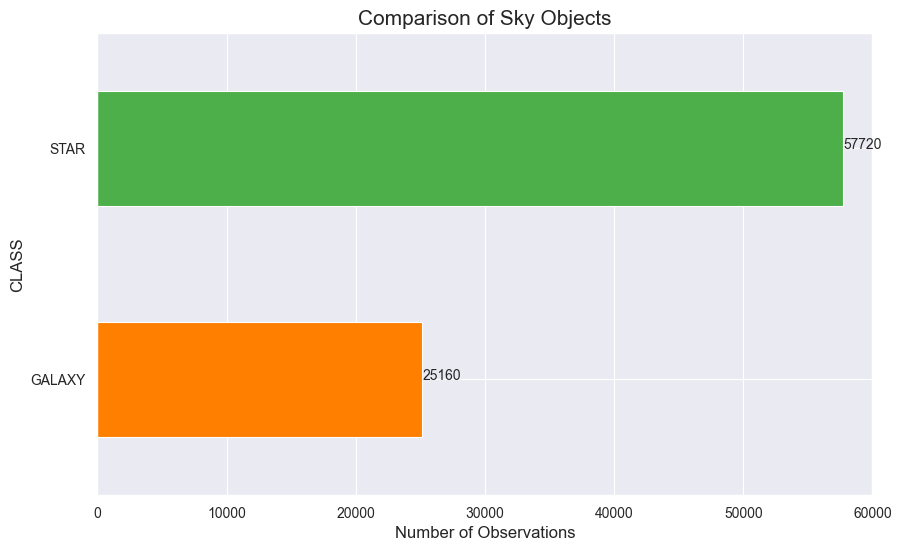

In [21]:
labels = [filtered_data['CLASS'].value_counts().iloc[0],
          filtered_data['CLASS'].value_counts().iloc[1]]

plt.figure(figsize=(10,6))
filtered_data['CLASS'].value_counts().plot(kind='barh', title='Comparison of Sky Objects',
                                           color=['#4daf4a','#ff7f00']).invert_yaxis()
plt.xlabel('Number of Observations')
plt.xlim(0,60000)
for index, value in enumerate(labels):
    plt.text(value, index, str(value))

plt.show()

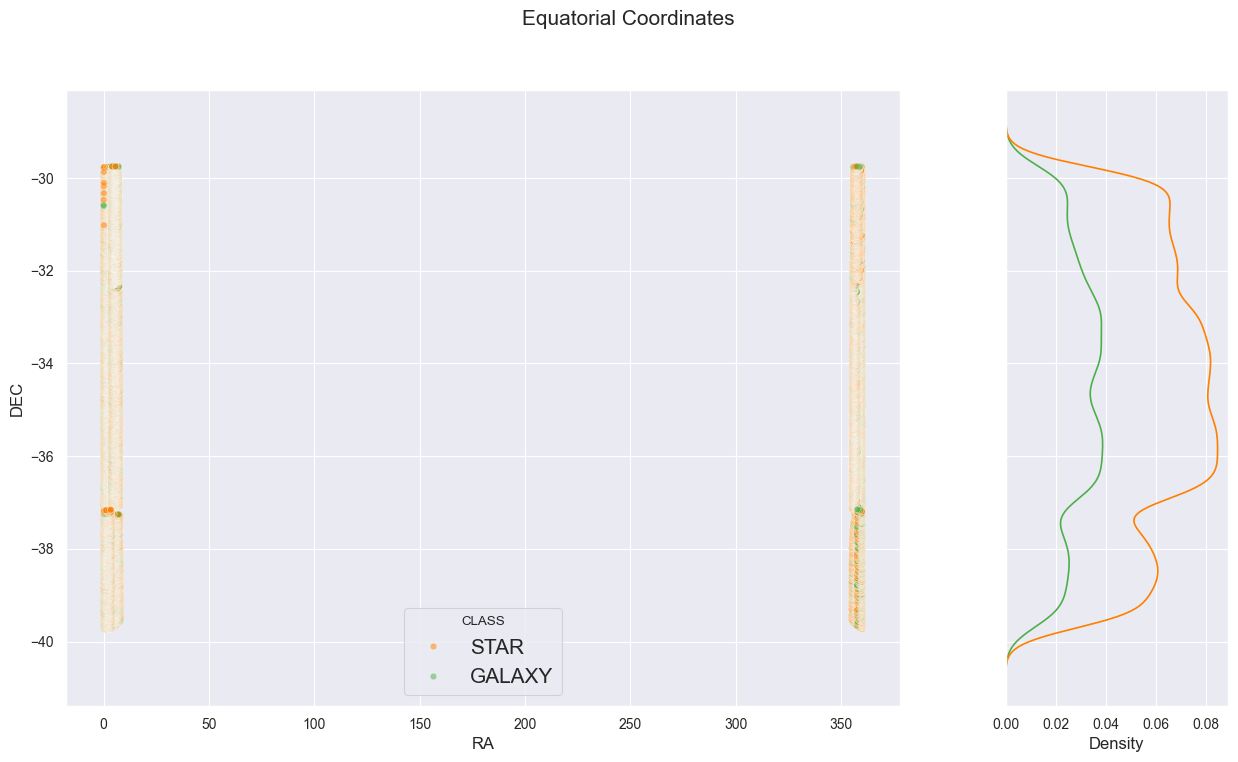

In [22]:
f, axs = plt.subplots(1,2,
                      figsize=(15,8),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.8]))
sns.scatterplot(x = 'RA',y = 'DEC', hue = 'CLASS', data = filtered_data, ax = axs[0], palette = palette, alpha = 0.5)
sns.kdeplot(y = 'DEC', hue = 'CLASS', data = filtered_data, ax = axs[1], palette = palette, legend = False)
f.tight_layout

plt.suptitle('Equatorial Coordinates', fontsize = 15);

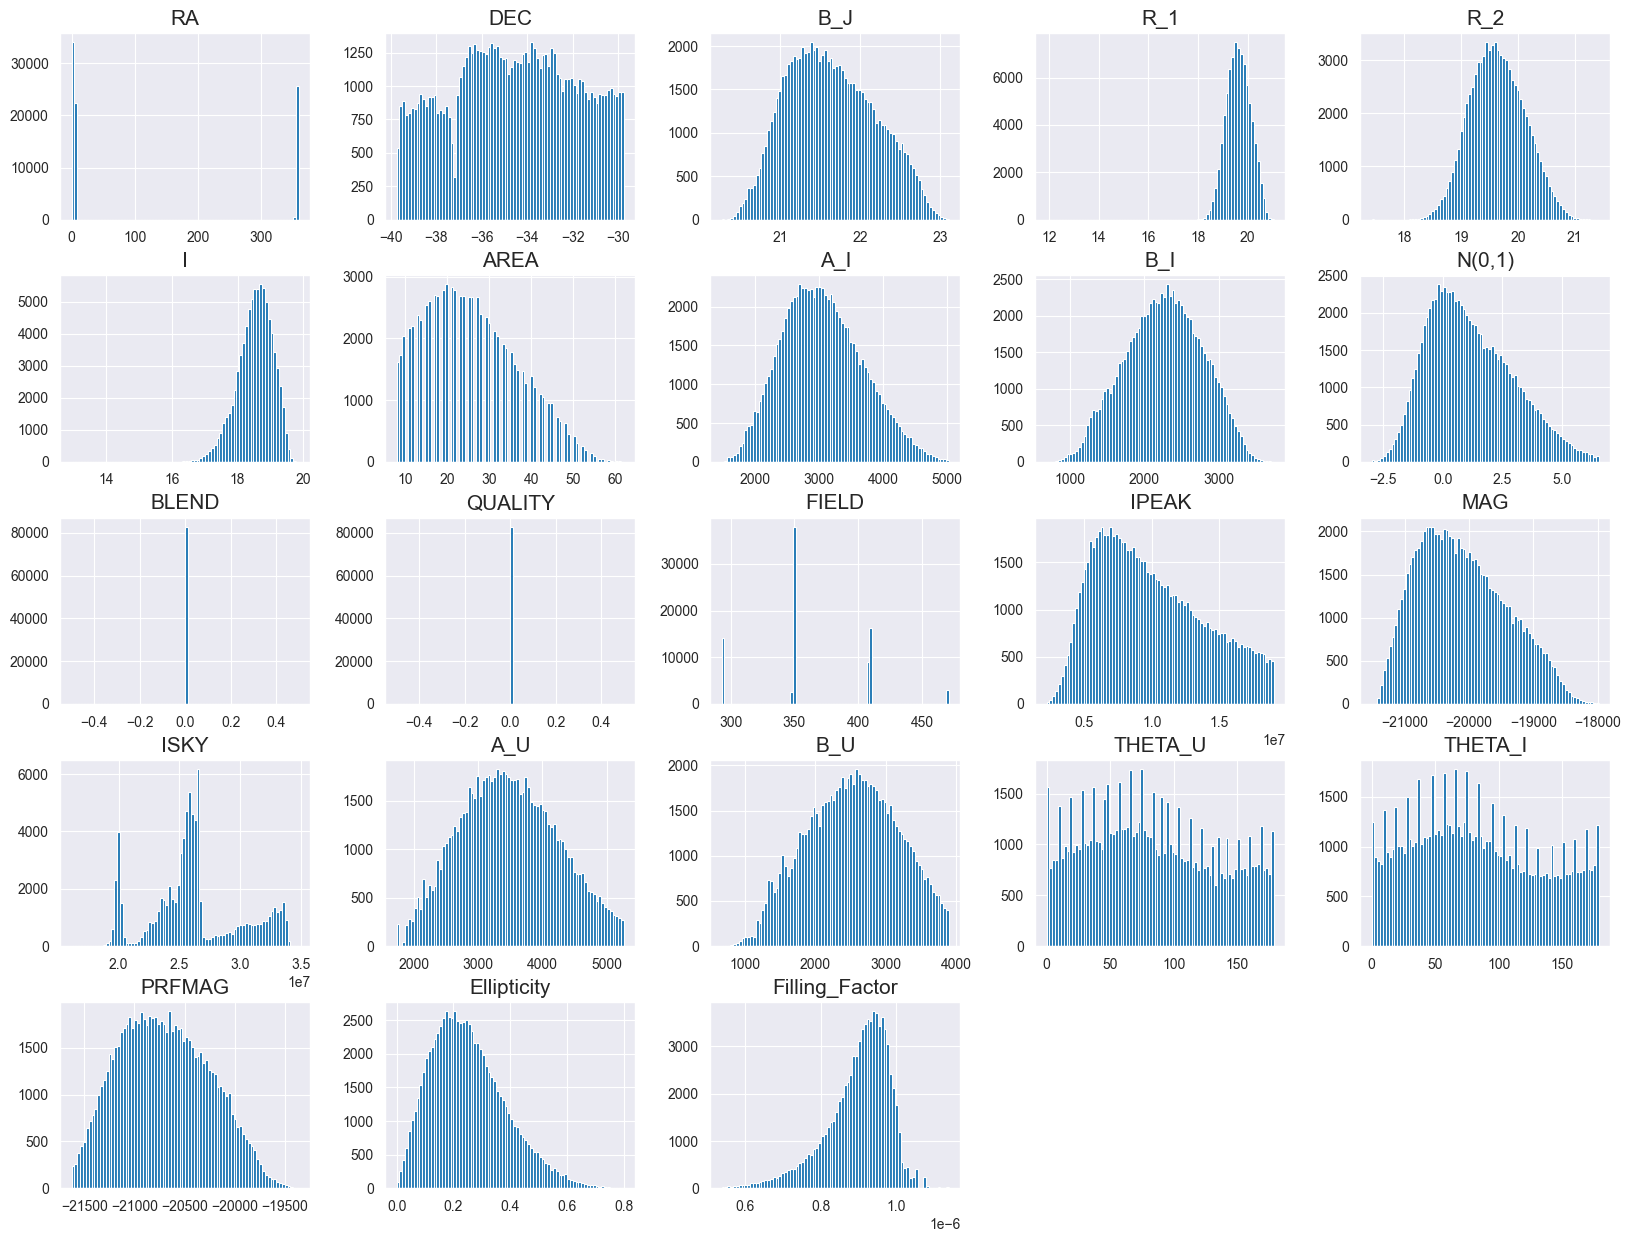

In [23]:
filtered_data.hist(bins = 80, figsize = (20,15));

In [24]:
def get_hists(feature_name):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5), sharex = True)
    
    ax = sns.histplot(filtered_data[filtered_data['CLASS']=='GALAXY'][feature_name], bins = 30, ax = axes[0], 
                      color = '#4daf4a', kde = False)
    ax.set_title('Galaxy')
    ax = sns.histplot(filtered_data[filtered_data['CLASS']=='STAR'][feature_name], bins = 30, ax = axes[1], 
                      color = '#ff7f00', kde = False)
    ax.set_title('Star')

    fig.suptitle(feature_name.upper(), fontsize = 15)
    fig.tight_layout(pad = 0.5);

C:\Users\aleksa.toroman\AppData\Local\Temp\ipykernel_2880\442528150.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5), sharex = True)


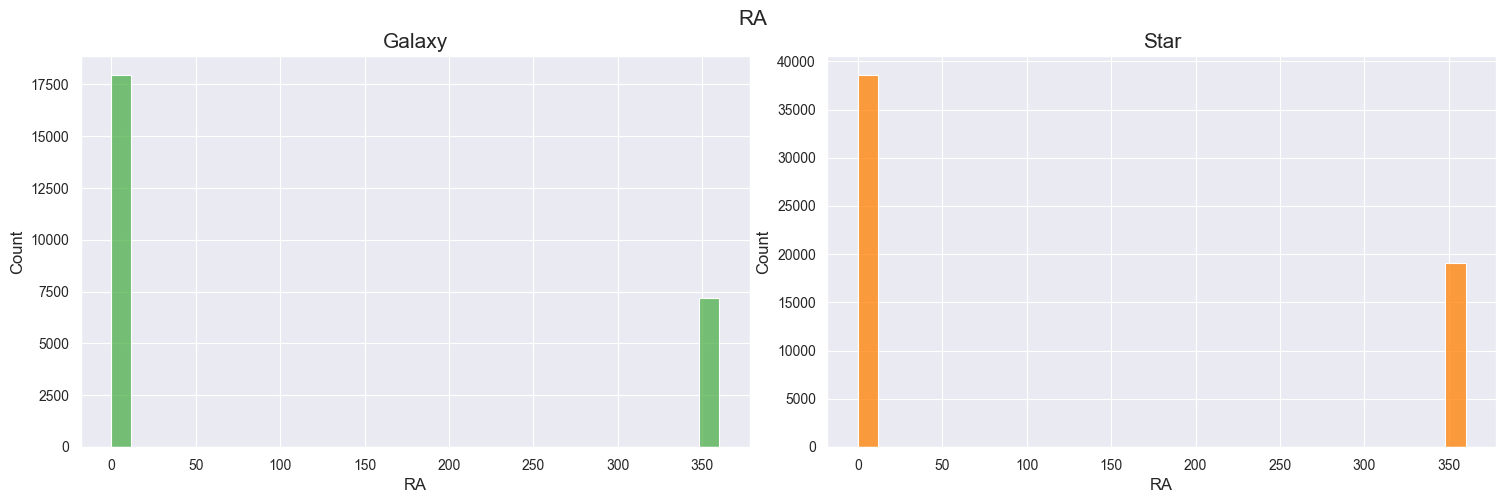

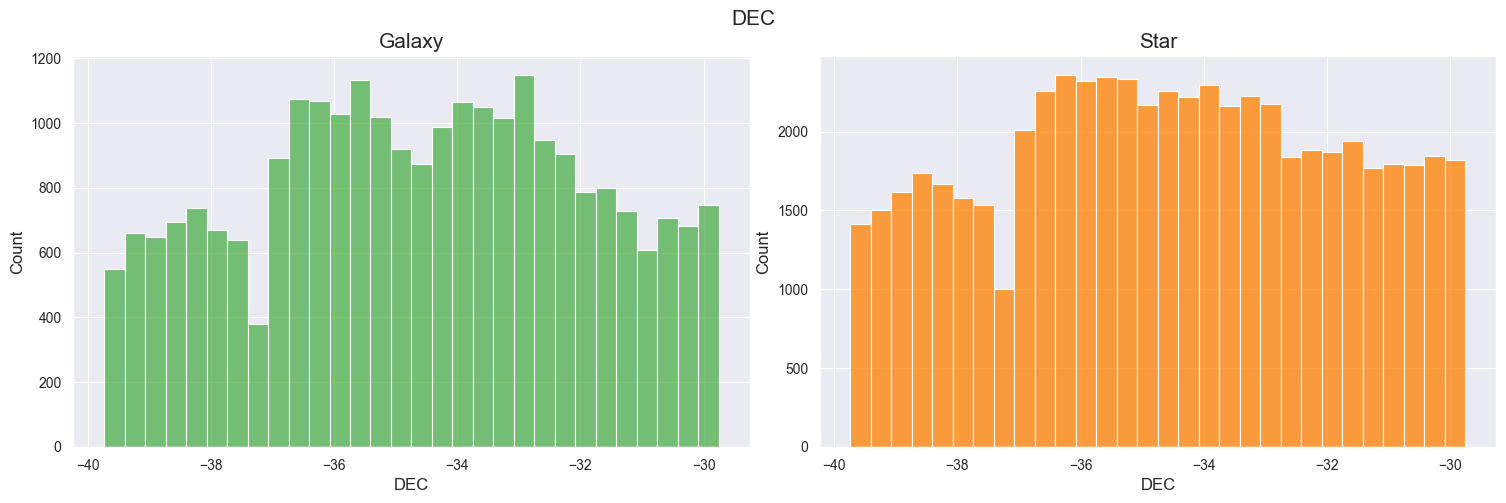

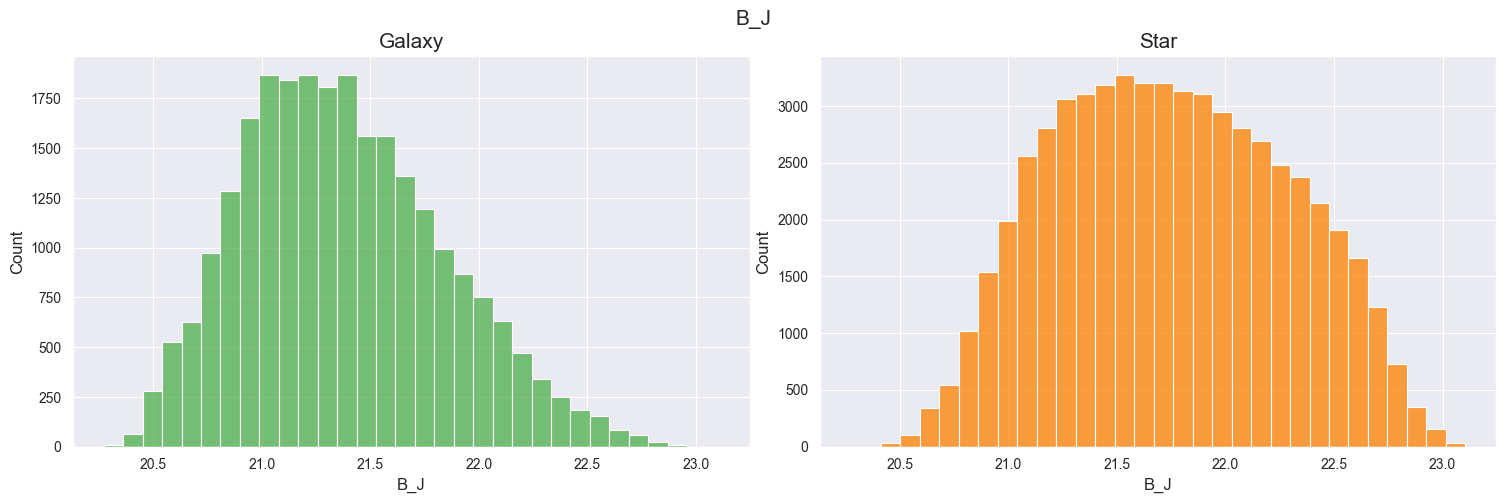

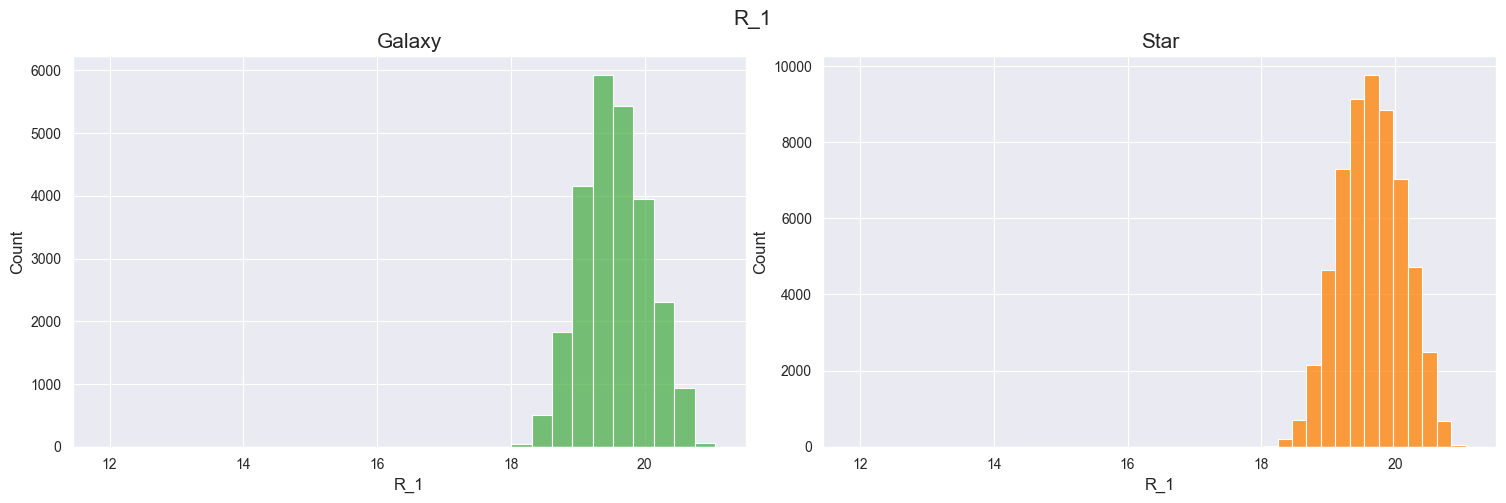

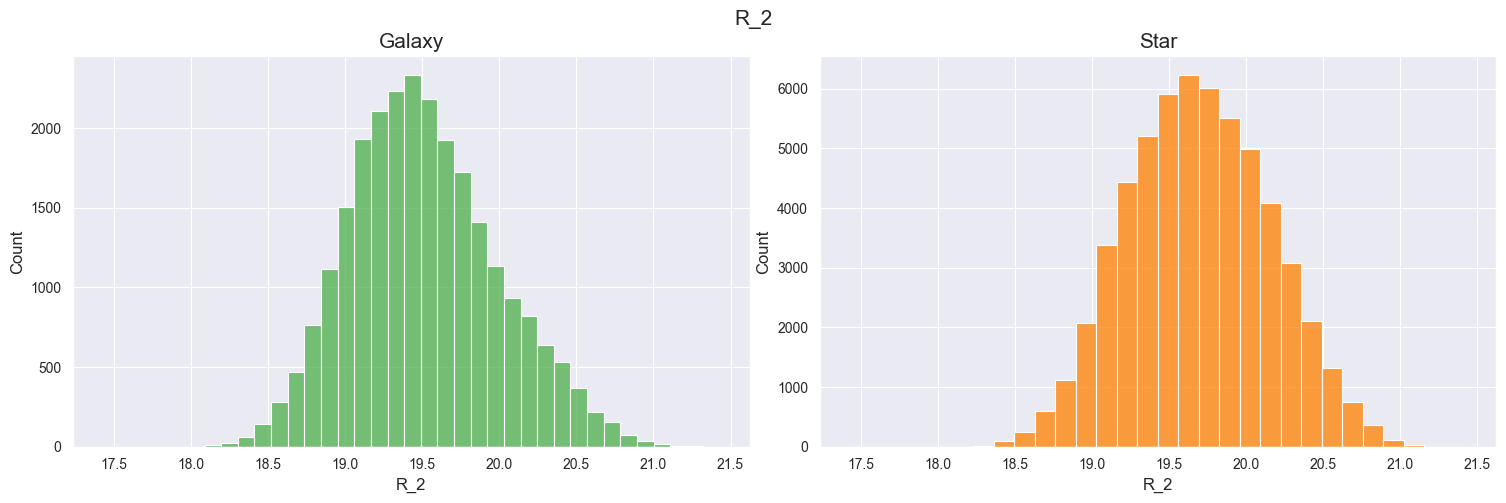

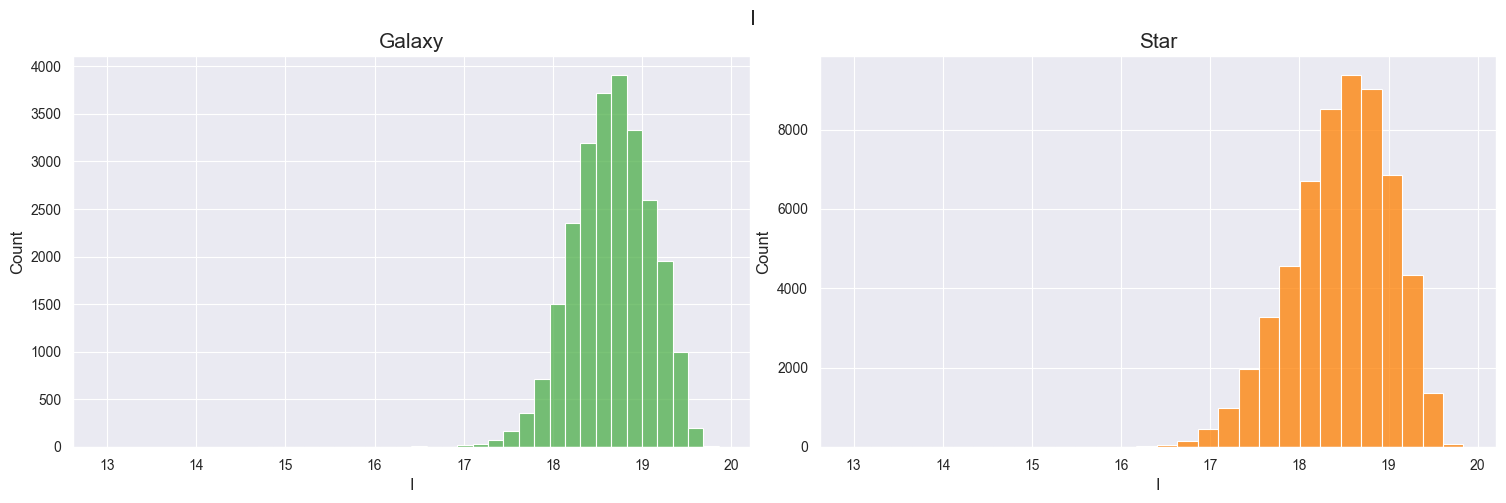

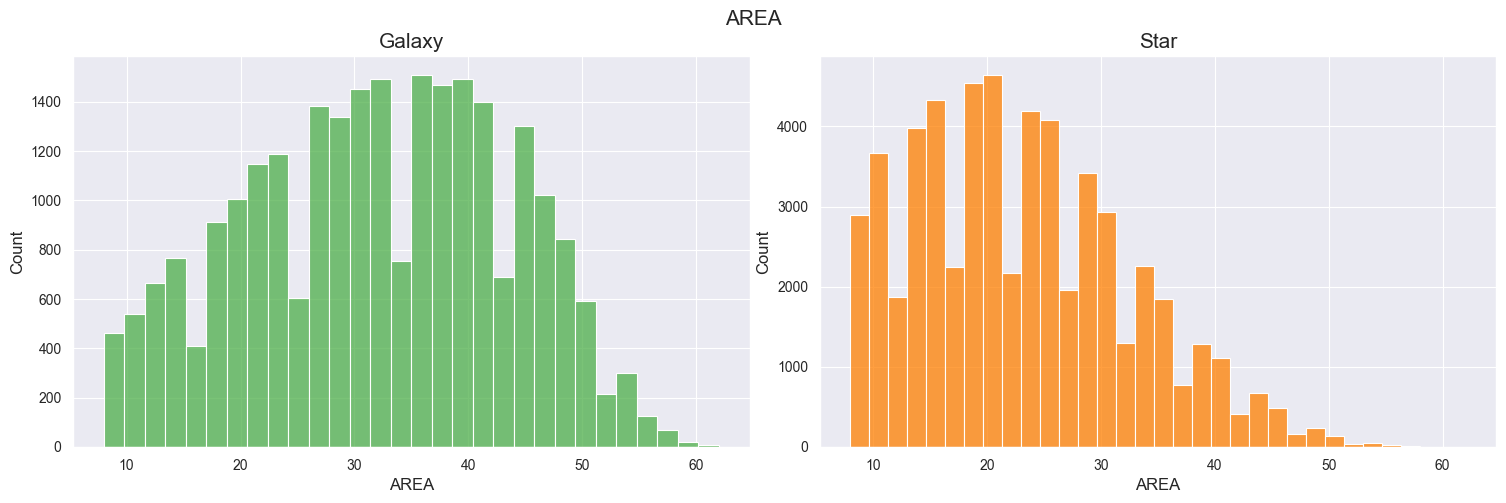

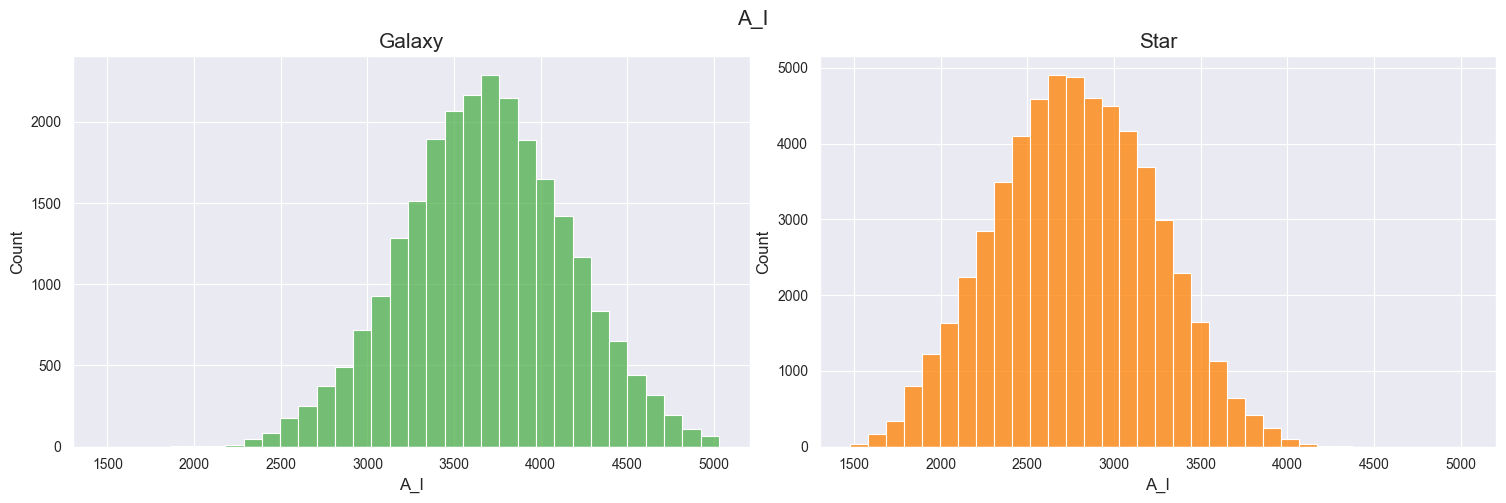

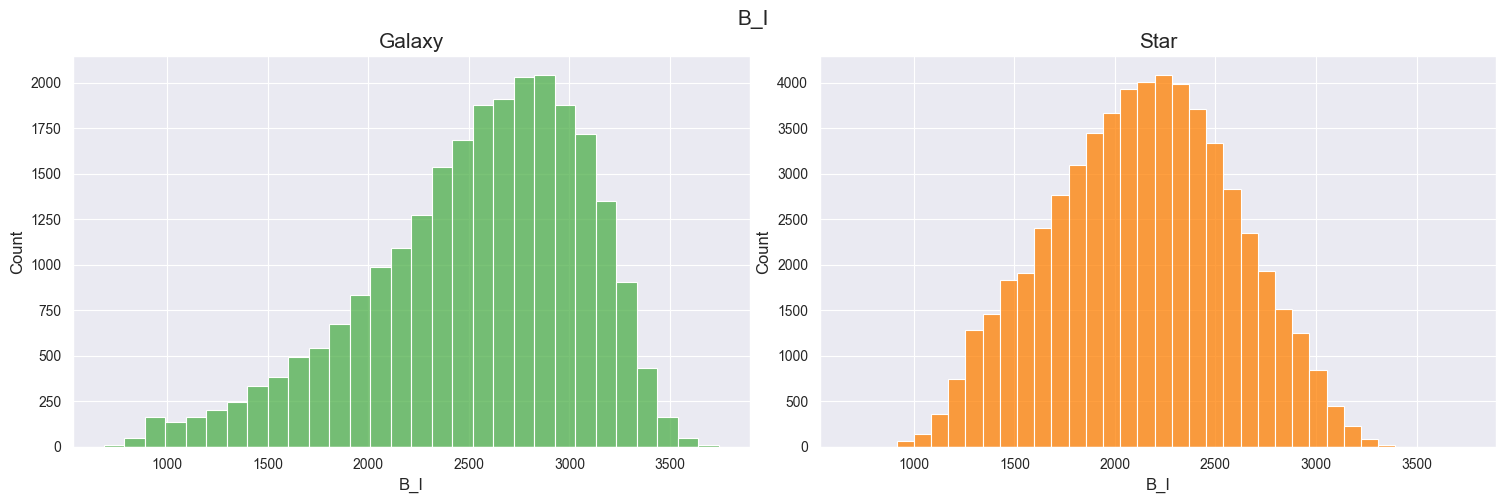

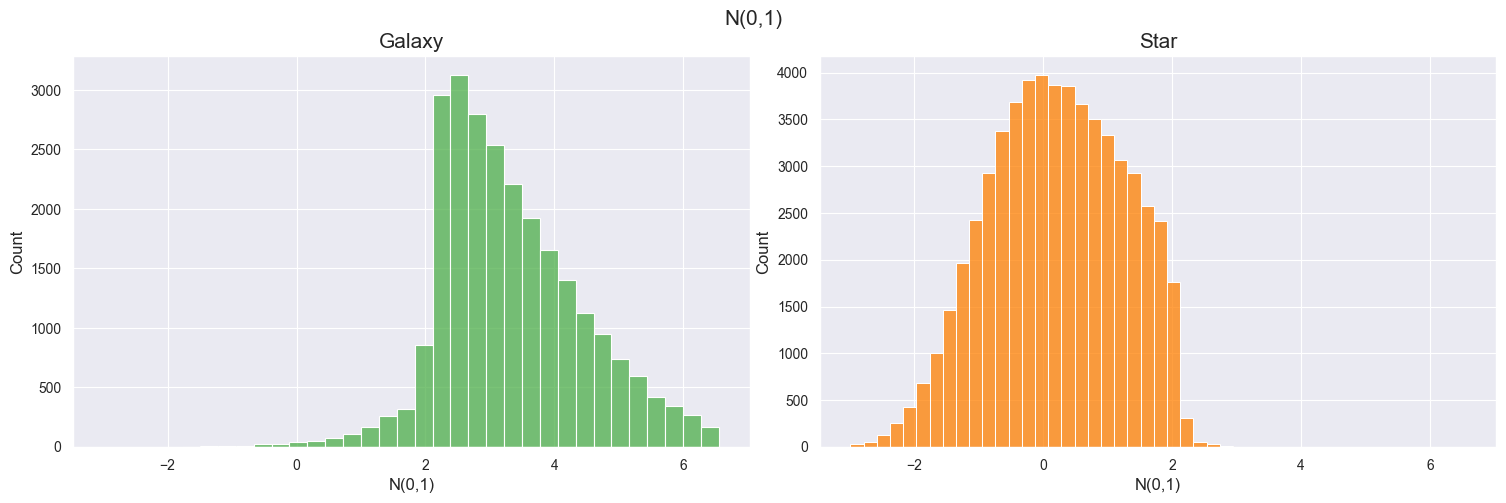

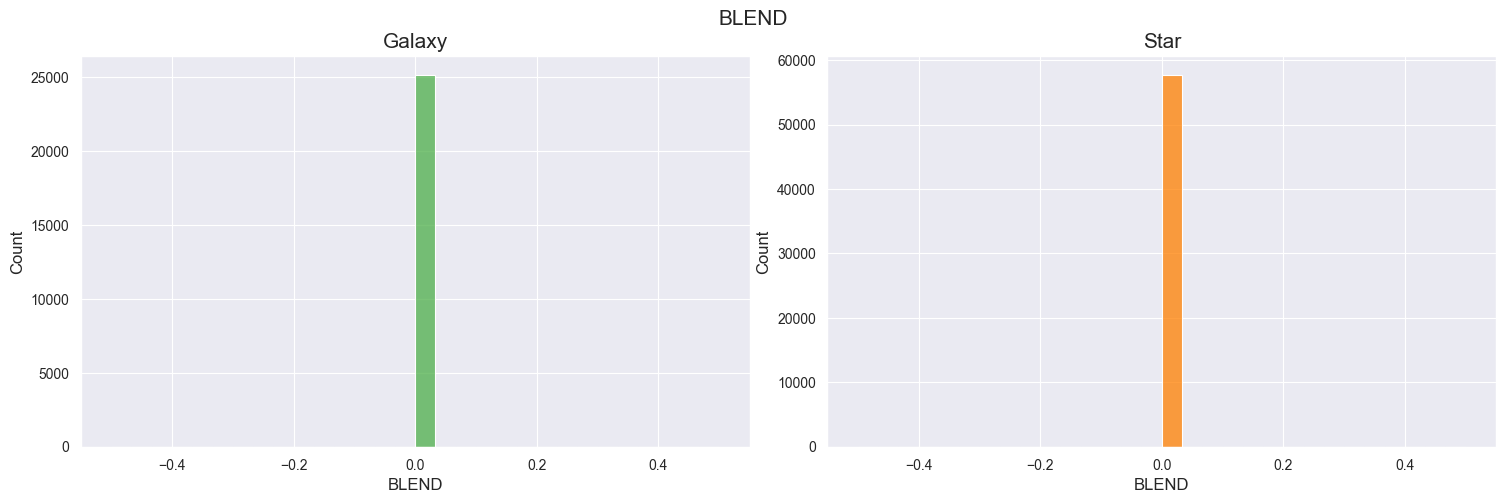

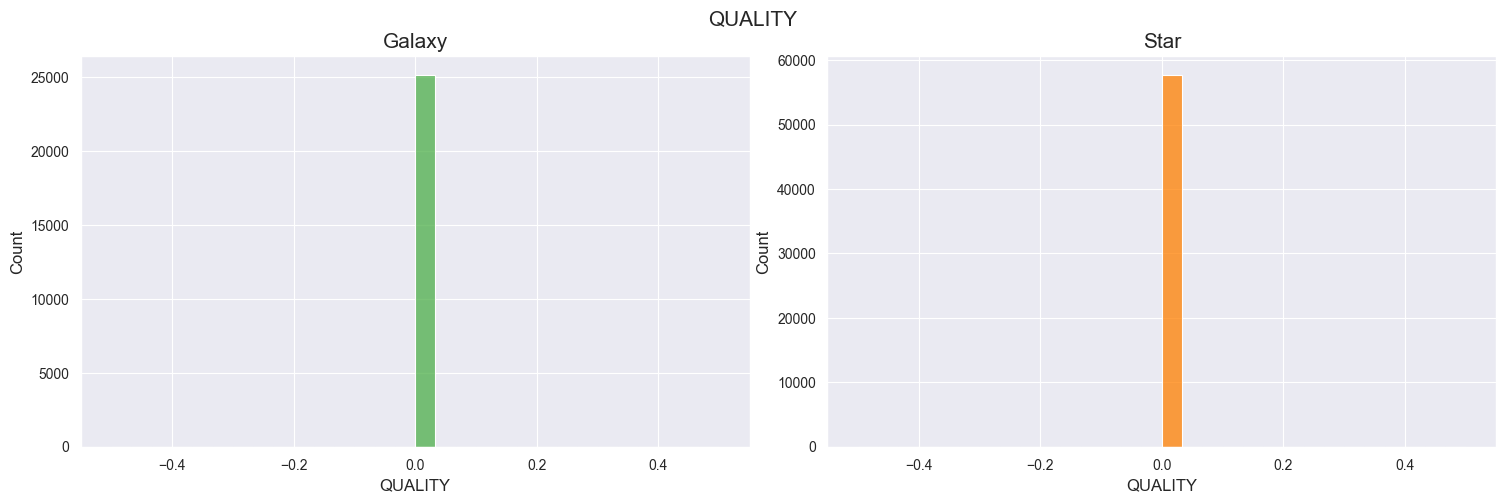

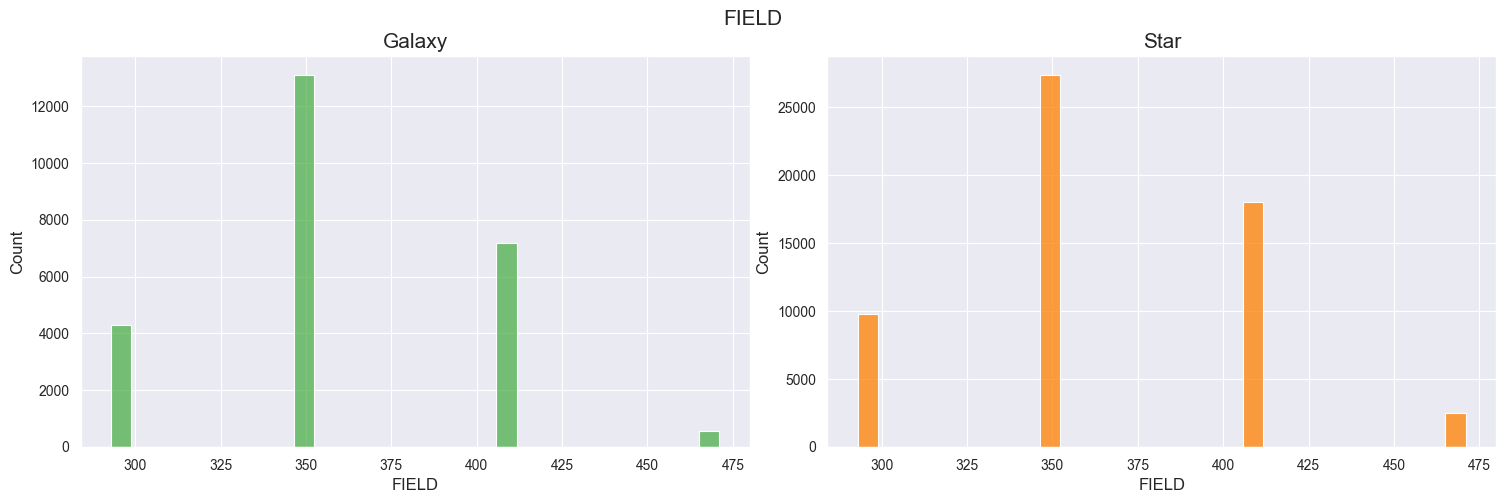

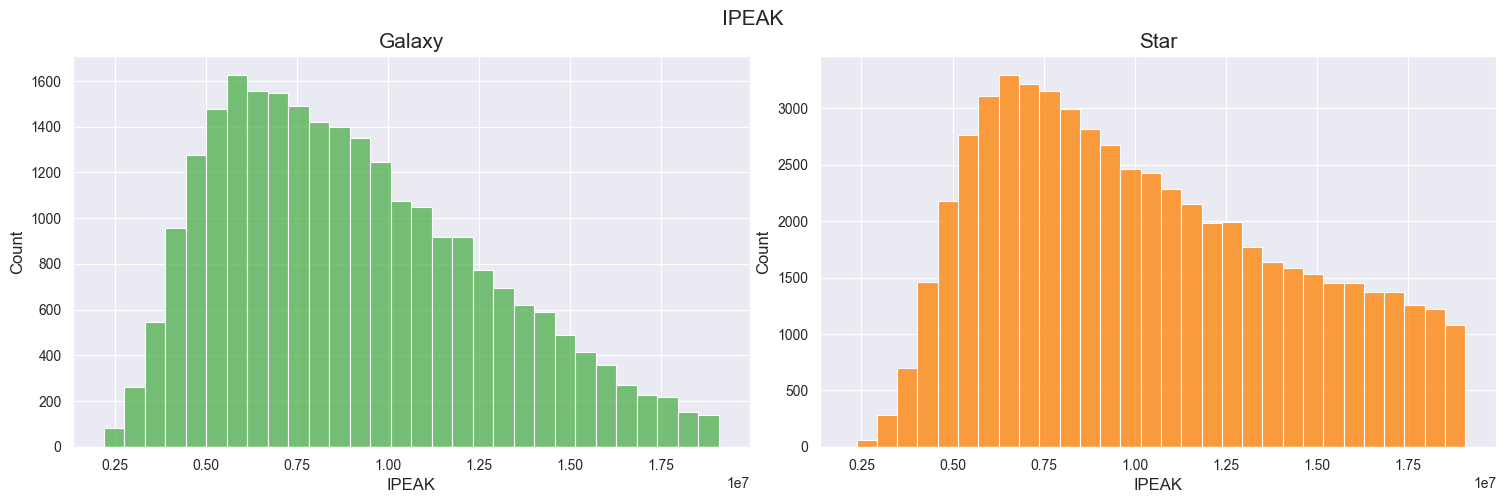

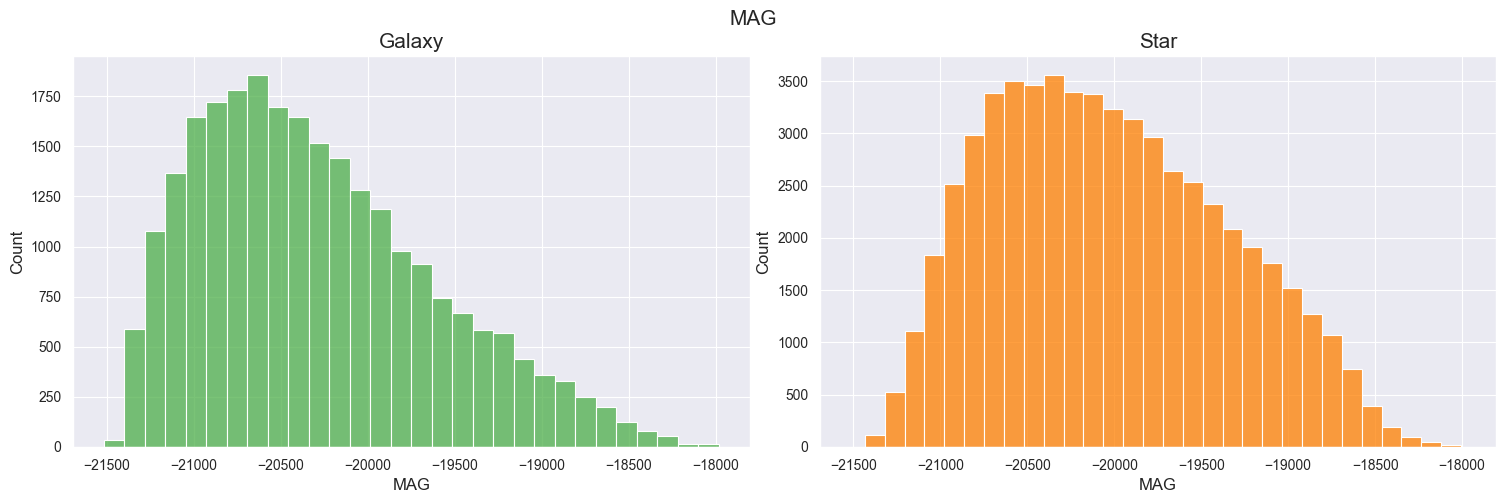

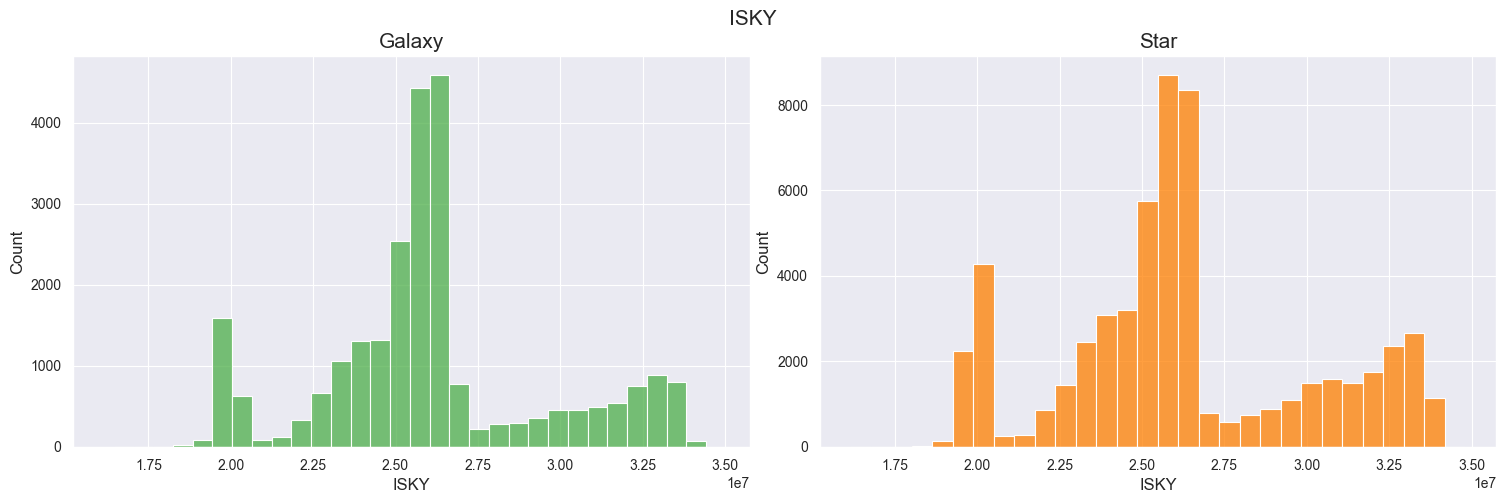

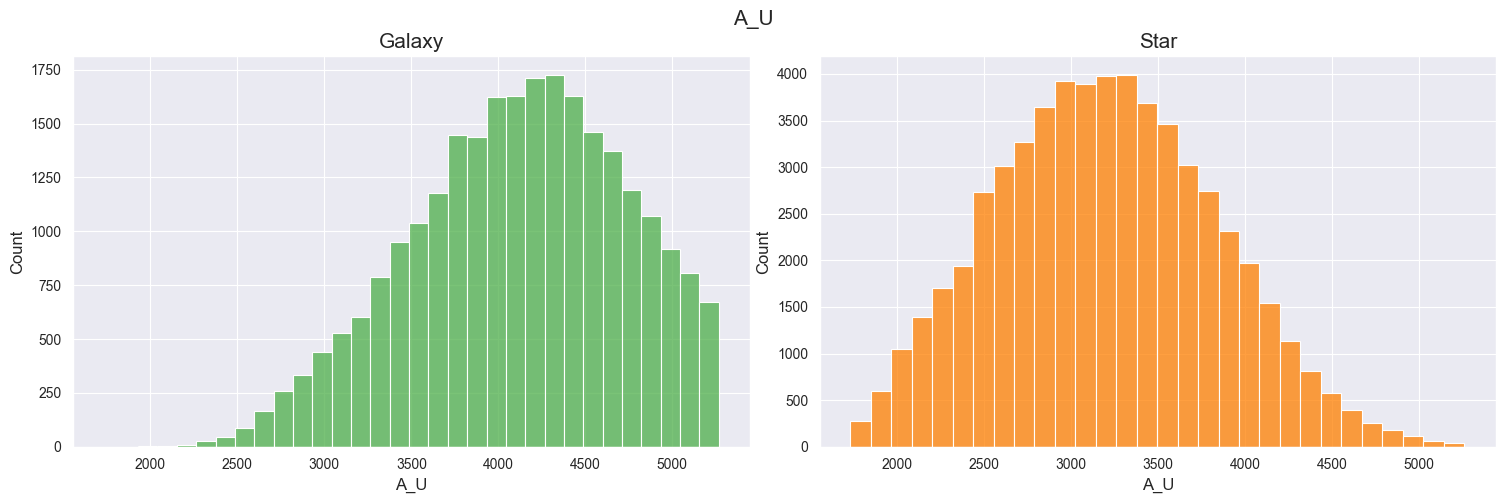

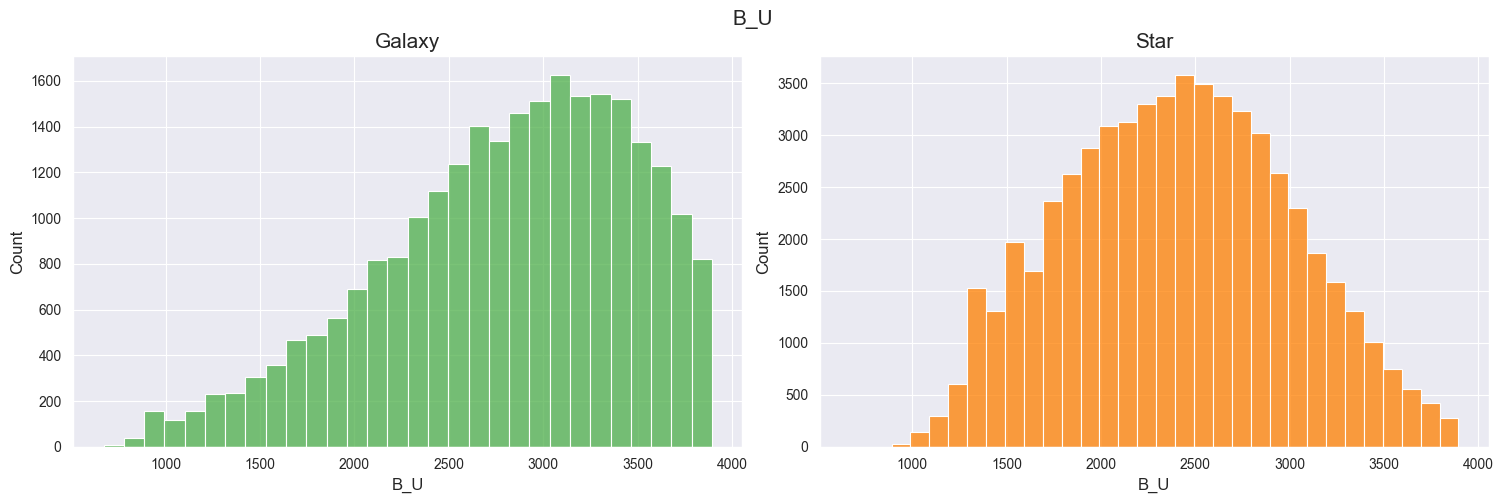

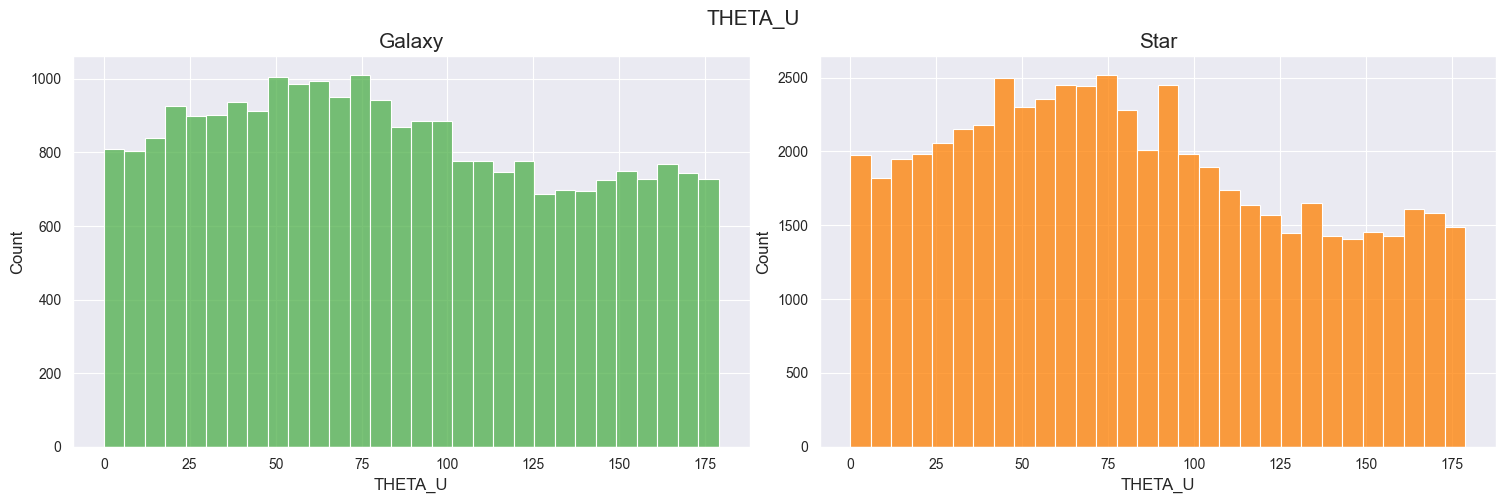

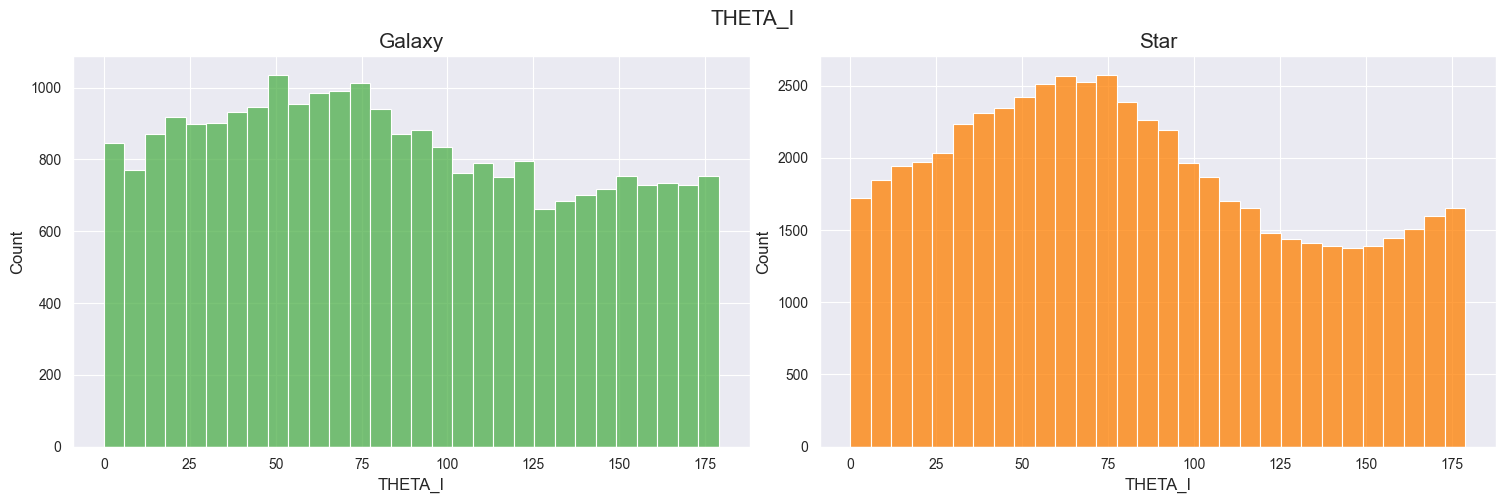

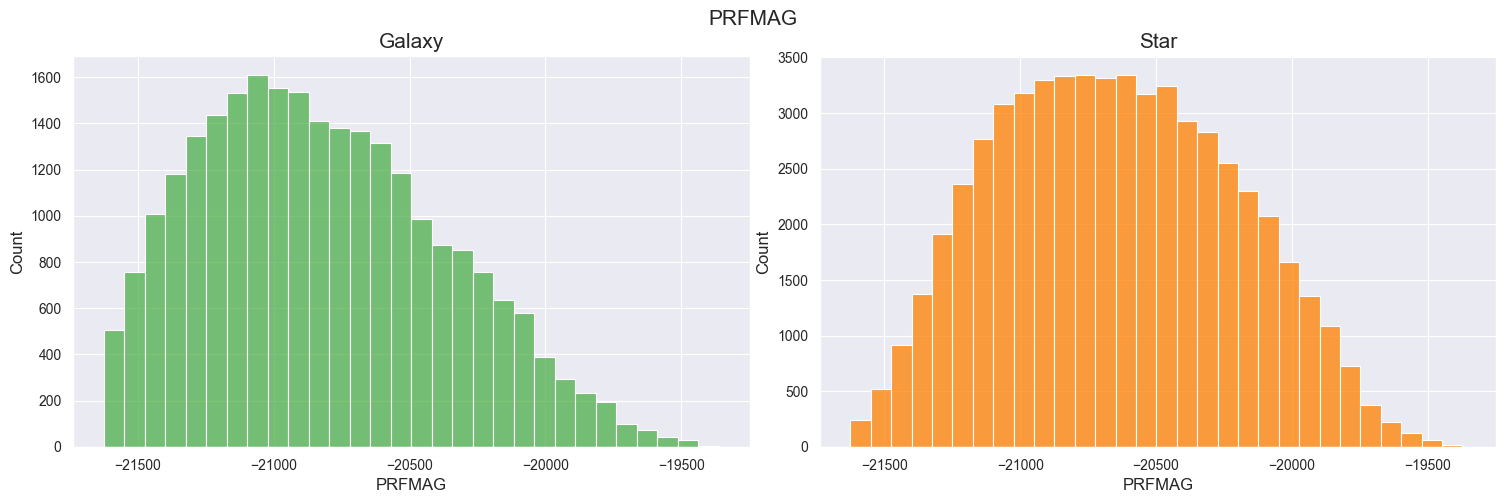

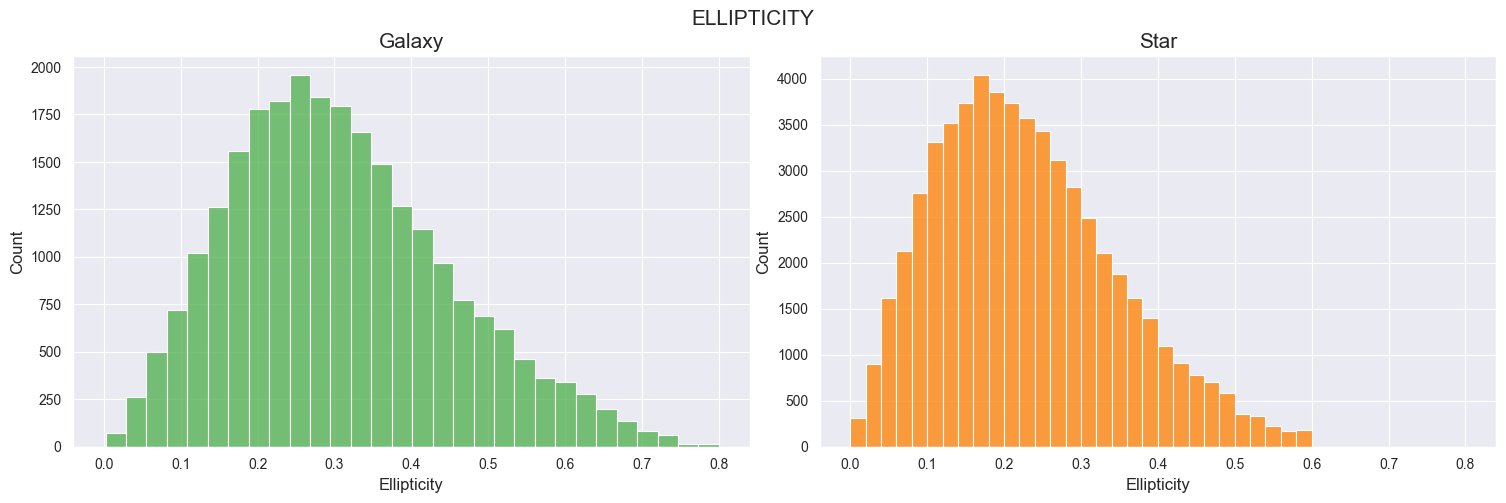

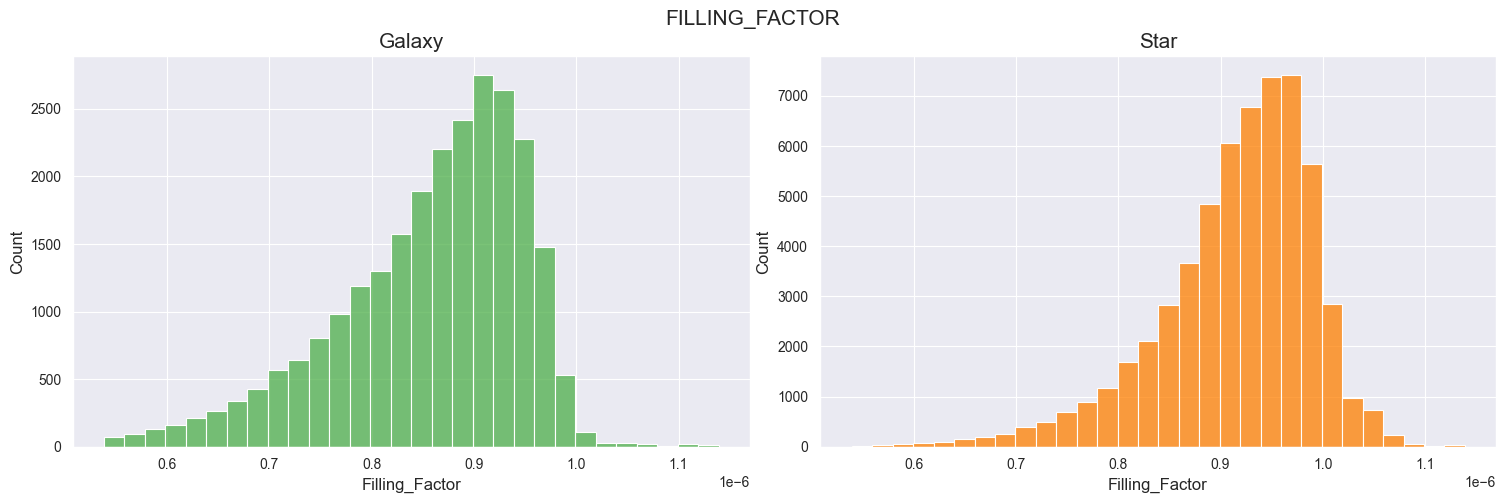

In [25]:
columns = list(filtered_data.drop(['CLASS'], axis = 1).columns)
for name in columns:
    get_hists(name)

## Baseline Model - Logistic Regression

In [26]:
filtered_data.head()

,RA,DEC,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
4239,0.882126,-37.194132,22.493,18.947,19.554,18.393,10,2533,1495,STAR,...,5499352,-18914,25065068,2576,1537,148,143,-19984,0.409791,8.039525e-07
4327,359.935151,-37.190322,20.879,18.715,19.008,18.707,39,4085,2556,GALAXY,...,12334194,-20835,24975306,4713,2915,174,171,-21184,0.374296,9.036052e-07
4363,0.029664,-37.188326,21.254,19.370,19.485,18.590,25,3073,1860,STAR,...,15755100,-20508,25024336,3787,2219,62,64,-20951,0.394728,9.469729e-07
4370,1.829328,-37.188083,21.456,19.108,19.217,19.132,24,3097,2507,GALAXY,...,5513390,-19834,24811362,3397,2611,52,54,-20505,0.190507,8.613089e-07
4377,2.072683,-37.187900,22.040,19.606,20.126,19.028,16,2660,1841,STAR,...,6773234,-19558,24805952,2971,1912,82,86,-20338,0.307895,8.965604e-07


In [27]:
filtered_data.drop(columns=['RA', 'DEC'], inplace=True)

In [28]:
filtered_data.head()

,B_J,R_1,R_2,I,AREA,A_I,B_I,CLASS,"N(0,1)",BLEND,...,IPEAK,MAG,ISKY,A_U,B_U,THETA_U,THETA_I,PRFMAG,Ellipticity,Filling_Factor
4239,22.493,18.947,19.554,18.393,10,2533,1495,STAR,0.532,0,...,5499352,-18914,25065068,2576,1537,148,143,-19984,0.409791,8.039525e-07
4327,20.879,18.715,19.008,18.707,39,4085,2556,GALAXY,4.822,0,...,12334194,-20835,24975306,4713,2915,174,171,-21184,0.374296,9.036052e-07
4363,21.254,19.370,19.485,18.590,25,3073,1860,STAR,-0.136,0,...,15755100,-20508,25024336,3787,2219,62,64,-20951,0.394728,9.469729e-07
4370,21.456,19.108,19.217,19.132,24,3097,2507,GALAXY,2.806,0,...,5513390,-19834,24811362,3397,2611,52,54,-20505,0.190507,8.613089e-07
4377,22.040,19.606,20.126,19.028,16,2660,1841,STAR,0.912,0,...,6773234,-19558,24805952,2971,1912,82,86,-20338,0.307895,8.965604e-07


## Baseline Model - Logistic Regression

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

from sklearn.decomposition import PCA

In [30]:
X = filtered_data.drop('CLASS', axis=1)
y = filtered_data['CLASS']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [32]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [33]:
logreg_baseline = LogisticRegression(solver='lbfgs')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(logreg_baseline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

logreg_baseline.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_test_pred = logreg_baseline.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.3f}')

# Print classification report on the test set
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Mean Accuracy: 0.974 (0.002)
Test Accuracy: 0.974
Classification Report on Test Data:
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96      6289
        STAR       0.98      0.98      0.98     14431

    accuracy                           0.97     20720
   macro avg       0.97      0.97      0.97     20720
weighted avg       0.97      0.97      0.97     20720



In [34]:
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Galaxy', 'Star'], yticklabels=['Galaxy', 'Star'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


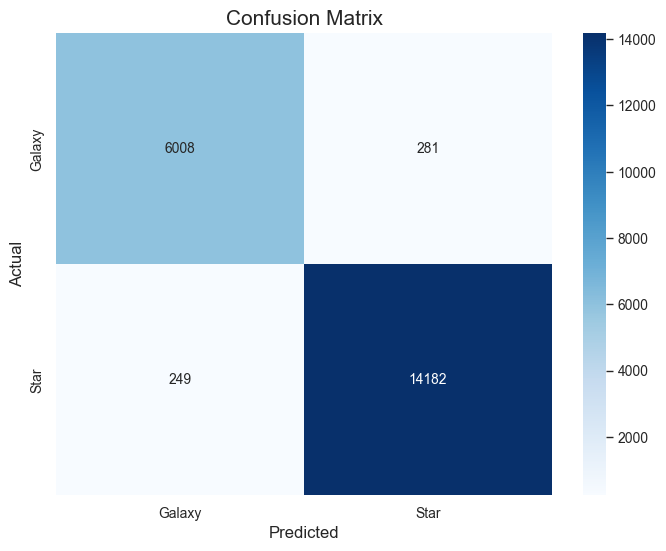

In [35]:
# call plot_confusion_matrix
plot_confusion_matrix(y_test, y_test_pred)

In [36]:
print('Logistic Regression with Standard Scaling - Test Set')
print(metrics.classification_report(y_test, y_test_pred, digits = 3))

Logistic Regression with Standard Scaling - Test Set
              precision    recall  f1-score   support

      GALAXY      0.960     0.955     0.958      6289
        STAR      0.981     0.983     0.982     14431

    accuracy                          0.974     20720
   macro avg      0.970     0.969     0.970     20720
weighted avg      0.974     0.974     0.974     20720

